In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

data=pd.read_csv("company_sales_data.csv")
clients_id = pd.read_csv("clients_id_c.csv")
products_id = pd.read_csv("products_id_c.csv")
transactions = pd.read_csv("transactions_c.csv")
merge_table = pd.merge(transactions, clients_id, on="client_id")
merge_table = pd.merge(merge_table, products_id, on="id_prod")
merge_table = merge_table.reindex(columns= ["session_id", "date", "client_id", "sex", "birth", "id_prod", "price", "categ"])
merge_table["date"] = merge_table["date"].str[:-19]

In [287]:
display(article_sells_by_price)

,id_prod,price,item_selled
0,0_1421,19.99,598.0
1,0_1368,5.13,453.0
2,0_731,17.99,9.0
3,1_587,4.99,49.0
4,0_1507,3.99,346.0
...,...,...,...
3281,2_23,115.99,1.0
3282,0_146,17.14,23.0
3283,0_802,11.22,12.0
3284,1_140,38.56,4.0


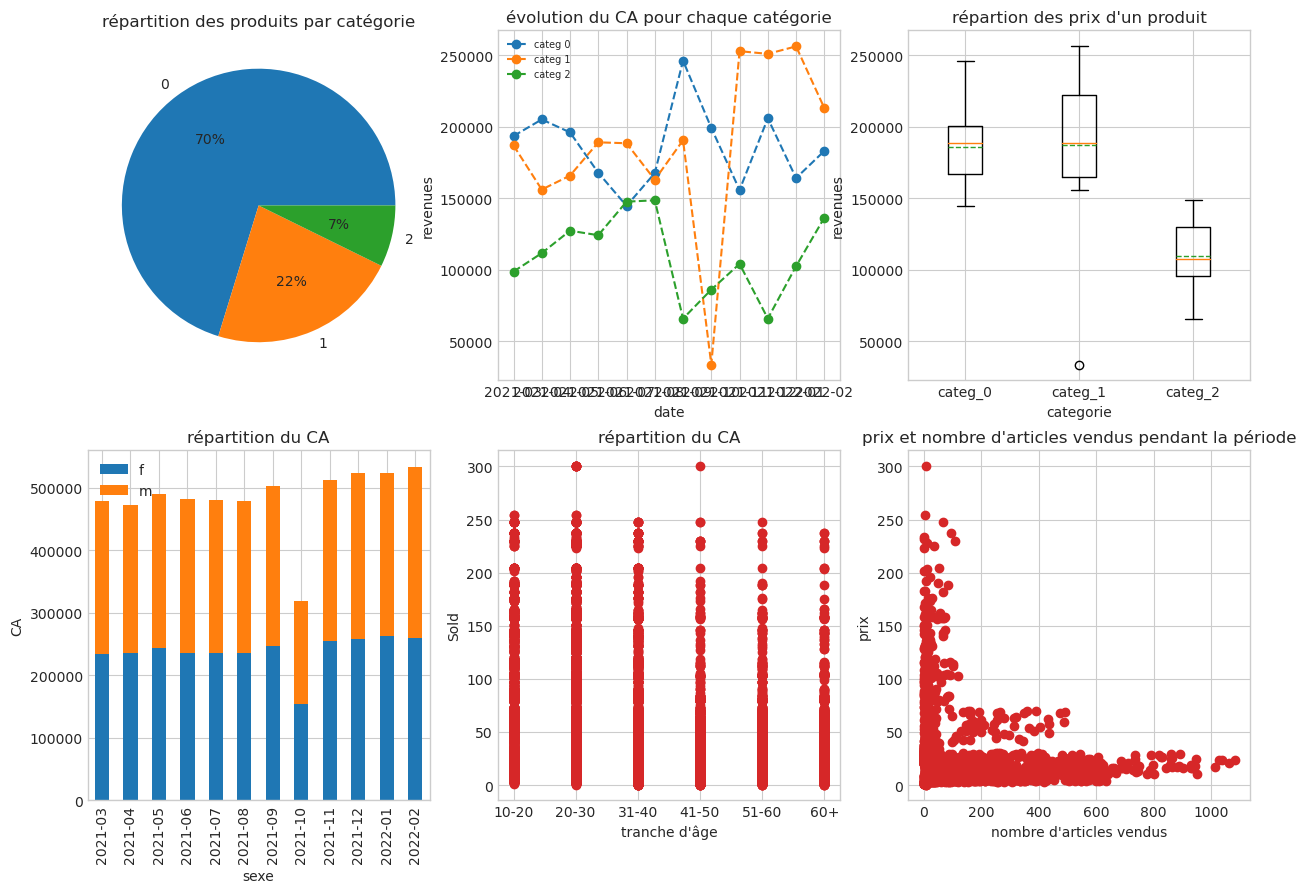

In [295]:
fig,ax1 = plt.subplots(2,3)
fig.set_size_inches(15,10)

#2.6. Graphe 6 : la répartition des produits par catégorie
ax1[0,0].pie(products_id["categ"].value_counts(normalize=True), labels=products_id["categ"].value_counts().index, autopct="%1.0f%%")
ax1[0,0].set(title="répartition des produits par catégorie")

#2.7. Graphe 7 : évolution du CA pour chaque catégorie
monthly_revenue = merge_table.groupby(["categ", "date"])["price"].sum().reset_index()
y_categ_0 = monthly_revenue.loc[monthly_revenue["categ"]==0]
y_categ_1 = monthly_revenue.loc[monthly_revenue["categ"]==1]
y_categ_2 = monthly_revenue.loc[monthly_revenue["categ"]==2]

ax1[0,1].plot(y_categ_0["date"], y_categ_0["price"], label="categ 0", linestyle='--', marker='o')
ax1[0,1].plot(y_categ_1["date"], y_categ_1["price"], label="categ 1", linestyle='--', marker='o')
ax1[0,1].plot(y_categ_2["date"], y_categ_2["price"], label="categ 2", linestyle='--', marker='o')
ax1[0,1].grid(True)
ax1[0,1].set(title="évolution du CA pour chaque catégorie", ylabel="revenues", xlabel="date")
ax1[0,1].legend(fontsize=7)

#2.8. Graphe 8 : boxplot de la répartion des prix d'un produit pour chaque catégorie
ax1[0,2].boxplot([y_categ_0["price"], y_categ_1["price"], y_categ_2["price"]], labels=["categ_0", "categ_1", "categ_2"],  showmeans=True, meanline=True)
ax1[0,2].set(title="répartion des prix d'un produit", ylabel="revenues", xlabel="categorie")

#2.9 Graphe 9 : la répartition du CA, pour chaque mois, en fonction du genre du client
monthly_revenue_by_sex =  merge_table.groupby(["date", "sex"])["price"].sum().unstack()
monthly_revenue_by_sex.plot(kind='bar', stacked=True, ax=ax1[1,0])
ax1[1,0].set(title="répartition du CA", ylabel="CA", xlabel="sexe")
ax1[1,0].legend()

#2.10 Graphe 10 : Pour chaque transaction, lie tranche d'âge du client et montant de la transaction.
annee_actuelle = datetime.datetime.now().year
merge_table["Age"] = annee_actuelle - merge_table["birth"]
bins = [10, 20, 30, 40, 50, 60, 100]
labels = ["10-20","20-30", "31-40", "41-50", "51-60", "60+"]
merge_table["Tranche d'âge"] = pd.cut(merge_table["Age"], bins=bins, labels=labels, right=False)
merge_table = merge_table.sort_values(by=["Tranche d'âge"])
ax1[1,1].scatter(merge_table["Tranche d'âge"], merge_table["price"],color = "C3")
ax1[1,1].set(title="répartition du CA", ylabel="Sold", xlabel="tranche d'âge")

#2.10 Graphe 11 : chaque article, lie prix et nombre d'articles vendus pendant la période
article_sells =  merge_table["id_prod"].value_counts()
article_sells_by_price = products_id.iloc[:,[0,1]]
article_sells_by_price = article_sells_by_price.assign(item_selled = article_sells_by_price["id_prod"].map(article_sells))
ax1[1,2].scatter(article_sells_by_price["item_selled"], article_sells_by_price["price"],color = "C3")
ax1[1,2].set(title="prix et nombre d'articles vendus pendant la période", ylabel="prix", xlabel="nombre d'articles vendus")

#afficher les graphe
plt.show()

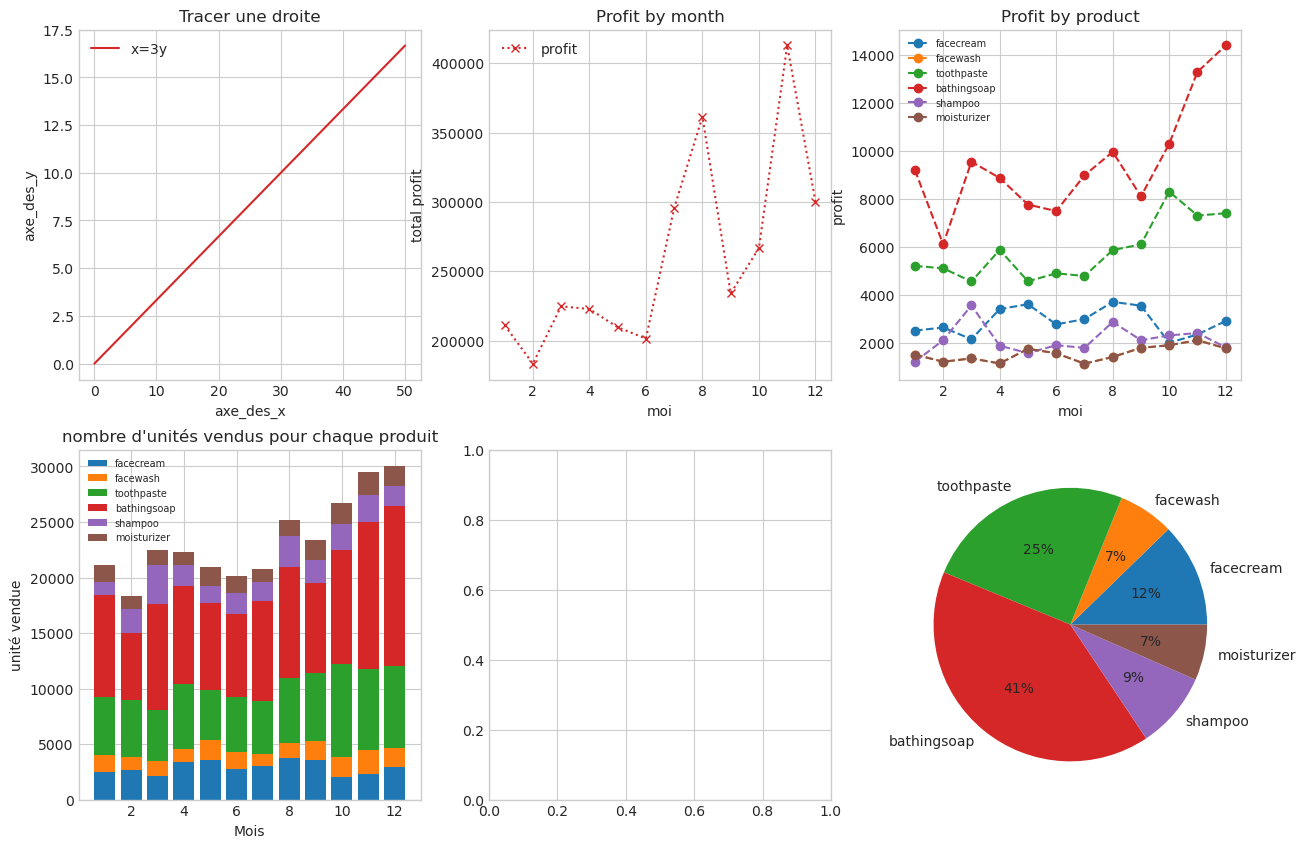

In [171]:
#definition de la figure
fig,ax = plt.subplots(2,3)
fig.set_size_inches(15,10)

# 2.1. Graphe 1
axe_des_x = np.arange(51)
axe_des_y = axe_des_x/3
ax[0,0].plot(axe_des_x, axe_des_y, color="C3", label="x=3y")
ax[0,0].grid(True)
ax[0,0].set(title='Tracer une droite', ylabel='axe_des_y', xlabel='axe_des_x')
ax[0,0].legend()


# 2.2. Graphe 2 : la courbe du profit total réalisé chaque mois
axe_des_x = data["month_number"]
axe_des_y = data["total_profit"]
ax[0,1].plot(axe_des_x, axe_des_y, color="C3", label="profit", linestyle='dotted', marker='x')
ax[0,1].grid(True)
ax[0,1].set(title='Profit by month', ylabel='total profit', xlabel='moi')
ax[0,1].legend()

# 2.3. Graphe 3 :  le profit pour chaque produit, en fonction du temps
ax[0,2].grid(True)
ax[0,2].plot(data["month_number"], data.iloc[:, 1:7], label=data.iloc[:, 1:7].columns, linestyle='--', marker='o')
ax[0,2].set(title='Profit by product', ylabel='profit', xlabel='moi')
ax[0,2].legend(fontsize=7)

# 2.4. Graphe 4 : chaque mois, le nombre d'unités vendus pour chaque produit
bottom =[0]*len(data.iloc[:, 1:7])
for product in data.iloc[:, 1:7].columns:
    ax[1,0].bar(data["month_number"], data[product], bottom=bottom)
    bottom += data[product]

ax[1,0].set(title="nombre d'unités vendus pour chaque produit", ylabel="unité vendue", xlabel="Mois")
ax[1,0].grid(True)
ax[1,0].legend(data.iloc[:, 1:7].columns, fontsize=7)

# 2.5. Graphe 5 : contribution de chaque produit dans le profit total
ax[1,2].pie(data.iloc[:, 1:7].sum(), labels=data.iloc[:, 1:7].columns, autopct="%1.0f%%")

#afficher les graphes
plt.show()